# **"Shirt Color Prediction Using YOLOv8"**

### The purpose of this notebook is to test the YOLOv8 model for shirt color prediction.

#### **Libraries Used:** 
>ultralytics

>matplotlib.pyplot

>cv2

#### **What is ultralytics library?**
>Ultralytics is a library for object detection, segmentation, and instance segmentation. It is used for image and video analysis.

#### **How to use?**

>1. Load the best weights of YOLOv8 model trained on the custom shirts data

>2. Store the predictions of model

>3. Using different scripts, test it on images, videos and live feed


# +_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+

## **Install ultralytics**

In [ ]:
%pip install ultralytics

In [ ]:
pip install torch

## **Load the best weights of trained YOLO**

In [1]:
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('best.pt')


## **Test model on image files**

## **Test model on image files**


image 1/1 C:\Users\majid\Downloads\Shirt_Detection_Team_Usama\test\1.webp: 640x544 1 Grey_Shirt, 176.0ms
Speed: 4.0ms preprocess, 176.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 C:\Users\majid\Downloads\Shirt_Detection_Team_Usama\test\2.webp: 640x640 1 Black_Shirt, 219.0ms
Speed: 4.0ms preprocess, 219.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\majid\Downloads\Shirt_Detection_Team_Usama\test\3.jpg: 640x640 1 Blue_Shirts, 403.1ms
Speed: 12.0ms preprocess, 403.1ms inference, 14.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\majid\Downloads\Shirt_Detection_Team_Usama\test\4.webp: 640x448 1 Blue_Shirts, 189.0ms
Speed: 3.0ms preprocess, 189.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 C:\Users\majid\Downloads\Shirt_Detection_Team_Usama\test\5.jpg: 640x448 1 Grey_Shirt, 157.0ms
Speed: 3.0ms preprocess, 157.0ms inference, 0.0ms postprocess per image at 

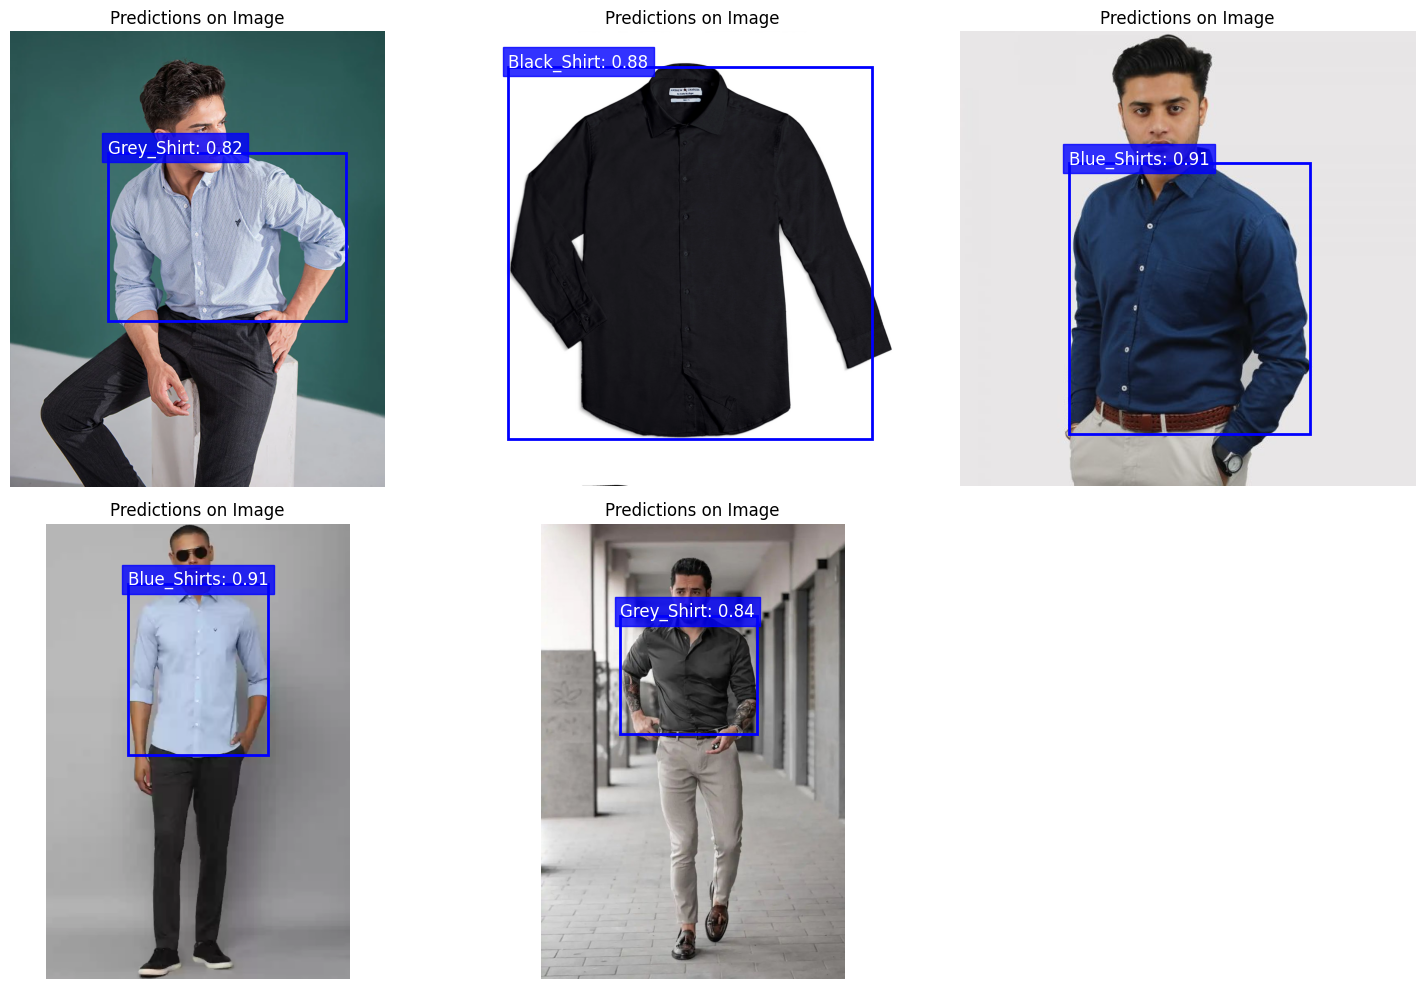

In [3]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Initialize the YOLO model (assuming the model has been loaded)
model = YOLO("best1.pt")  # Replace with your model path if different

# List of image paths
image_paths = [
    'C:/Users/majid/Downloads/Shirt_Detection_Team_Usama/test/1.webp',
    'C:/Users/majid/Downloads/Shirt_Detection_Team_Usama/test/2.webp',
    'C:/Users/majid/Downloads/Shirt_Detection_Team_Usama/test/3.jpg',
    'C:/Users/majid/Downloads/Shirt_Detection_Team_Usama/test/4.webp',
    'C:/Users/majid/Downloads/Shirt_Detection_Team_Usama/test/5.jpg'
]

# Determine the number of rows and columns for the subplot grid
num_images = len(image_paths)
cols = 3
rows = (num_images // cols) + (1 if num_images % cols else 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each image path and plot in a subplot
for i, image_path in enumerate(image_paths):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Make predictions
    results = model.predict(source=image_path)

    # Plot the image with predictions
    ax = axes[i]
    ax.imshow(image)
    ax.axis('off')  # Hide axes
    ax.set_title('Predictions on Image')

    # Plot the bounding boxes and labels
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='blue', linewidth=2))
            label = f"{result.names[int(box.cls[0])]}: {box.conf[0]:.2f}"
            ax.text(x1, y1, label, fontsize=12, color='white', bbox=dict(facecolor='blue', edgecolor='blue', alpha=0.8))

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## **Test model on live camera**

In [5]:
import cv2

cap = cv2.VideoCapture(0)
model = YOLO("best1.pt")  # Replace with your model path if different

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Make predictions
    results = model.predict(source=frame)

    # Draw bounding boxes and labels on the frame
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]  # Get the bounding box coordinates
            conf = box.conf[0]  # Get the confidence
            cls = box.cls[0]  # Get the class

            # Draw the bounding box and label
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, f'Class: {result.names[int(box.cls[0])]}, Conf: {conf:.2f}', (int(x1), int(y1) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with predictions
    cv2.imshow('Video Predictions', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 255.9ms
Speed: 70.0ms preprocess, 255.9ms inference, 13.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 125.0ms
Speed: 4.0ms preprocess, 125.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 122.0ms
Speed: 5.0ms preprocess, 122.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 144.0ms
Speed: 6.5ms preprocess, 144.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 82.0ms
Speed: 3.0ms preprocess, 82.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.0ms
Speed: 2.0ms preprocess, 93.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 125.0ms
Speed: 2.0ms preprocess, 125.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 159.0ms
Speed: 3.0ms preproc